In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("adult.data", sep=", ")
train.columns = ["age","workclass","fnlwgt","education","education_num","marital_status",
                 "occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week",
                 "native_country","income"]

In [3]:
test = pd.read_csv("adult.test",skiprows=1, sep=", ")
test.columns = ["age","workclass","fnlwgt","education","education_num","marital_status",
                 "occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week",
                 "native_country","income"]

In [4]:
df = pd.concat([test.assign(check="train"), train.assign(check="test")])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48840 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       48840 non-null  object
 2   fnlwgt          48840 non-null  int64 
 3   education       48840 non-null  object
 4   education_num   48840 non-null  int64 
 5   marital_status  48840 non-null  object
 6   occupation      48840 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital_gain    48840 non-null  int64 
 11  capital_loss    48840 non-null  int64 
 12  hours_per_week  48840 non-null  int64 
 13  native_country  48840 non-null  object
 14  income          48840 non-null  object
 15  check           48840 non-null  object
dtypes: int64(6), object(10)
memory usage: 6.3+ MB


In [6]:
#Data PreProcessing

df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48840 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       46041 non-null  object
 2   fnlwgt          48840 non-null  int64 
 3   education       48840 non-null  object
 4   education_num   48840 non-null  int64 
 5   marital_status  48840 non-null  object
 6   occupation      46031 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital_gain    48840 non-null  int64 
 11  capital_loss    48840 non-null  int64 
 12  hours_per_week  48840 non-null  int64 
 13  native_country  47983 non-null  object
 14  income          48840 non-null  object
 15  check           48840 non-null  object
dtypes: int64(6), object(10)
memory usage: 6.3+ MB


In [7]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
check                0
dtype: int64

In [8]:
#Imputing Mode inplace of Missing Values

for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
check             0
dtype: int64

In [9]:
X = df.drop(['income'], axis=1)
y = df['income']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
#LabelEncoding

categorical = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'
               ,'check']
for feature in categorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

In [12]:
#FeatureScaling

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [13]:
train, test = df[df["check"].eq("train")], df[df["check"].eq("test")]

In [14]:
#Training and Testing Logistic Regression Model

logist_reg = LogisticRegression()
logist_reg.fit(X_train, y_train)
y_pred = logist_reg.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_train_acc = logist_reg.score(X_train, y_train)
print("LR Training Accuracy Score: ", lr_train_acc)
print("LR Testing Accuracy Score: ", logist_reg.score(X_test, y_test))
print("Logistic Regression Accuracy Score:", lr_accuracy)
print(classification_report(y_test, y_pred))

LR Training Accuracy Score:  0.8251140751140751
LR Testing Accuracy Score:  0.8261670761670762
Logistic Regression Accuracy Score: 0.8261670761670762
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7405
      <=50K.       0.85      0.94      0.89      3714
        >50K       0.72      0.46      0.56      2370
       >50K.       0.72      0.45      0.55      1163

    accuracy                           0.83     14652
   macro avg       0.78      0.70      0.72     14652
weighted avg       0.82      0.83      0.81     14652



In [15]:
#Training and Testing Gaussian Naive Bayes Model

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_accuracy = nb.score(X_test, y_test)
nb_train_acc = nb.score(X_train, y_train)
print("GNB Training Accuracy Score: ", nb_train_acc)
print("GNB Testing Accuracy Score: ", nb.score(X_test, y_test))
print("Gaussian Naive Bayes Accuracy Score:", nb_accuracy)
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

GNB Training Accuracy Score:  0.8067450567450567
GNB Testing Accuracy Score:  0.8098553098553098
Gaussian Naive Bayes Accuracy Score: 0.8098553098553098
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      7405
      <=50K.       0.82      0.96      0.88      3714
        >50K       0.71      0.37      0.48      2370
       >50K.       0.71      0.34      0.46      1163

    accuracy                           0.81     14652
   macro avg       0.77      0.65      0.68     14652
weighted avg       0.80      0.81      0.79     14652



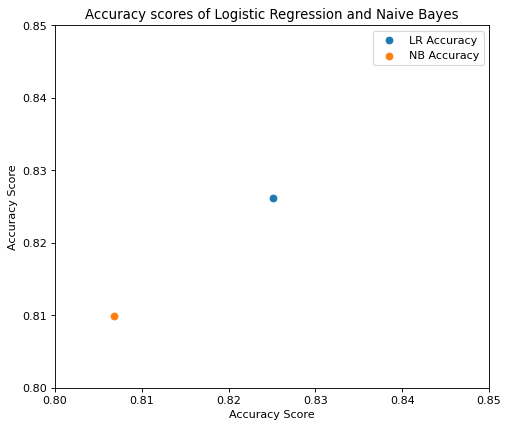

In [16]:
#Plotting the Accuracy Scores of Both Models

figure(figsize=(7, 6), dpi=80)
plot.xlim(0.80, 0.85)
plot.ylim(0.80, 0.85)
plot.scatter(lr_train_acc,lr_accuracy)
plot.scatter(nb_train_acc,nb_accuracy)
plot.title('Accuracy scores of Logistic Regression and Naive Bayes')
plot.xlabel('Accuracy Score')
plot.ylabel('Accuracy Score')
plot.legend(["LR Accuracy" , "NB Accuracy"])
plot.show()